In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [8]:
os.listdir('data')

['gender_submission.csv', 'test.csv', 'train.csv']

In [9]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
dataset = pd.concat([train_df, test_df], sort = False)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Exploratory Analysis

Basically we need to add a bunch more columns to the dataset

Catagorical Data 

From the columns we have Pclass, Name, Sex, SibSp, Parch, Cabin, Embarked

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Sex

C:\Users\codyl\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,Survived
Sex,
female,0.742038
male,0.188908


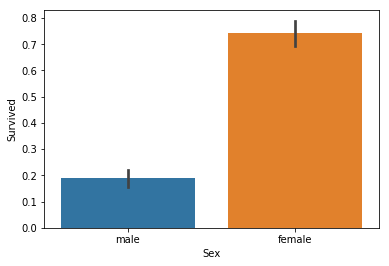

In [12]:
var = 'Sex'
sns.barplot(x = var, y = 'Survived',data = train_df[[var,'Survived']])
# strong correlation

# What is the correlation change of survival for F vs M?
# I want a spreadsheet of m,f vs survival
train_df[['Sex','Survived']].groupby('Sex').mean().sort_values(by = 'Survived', ascending = False)

In [13]:
train_df['Sex'].value_counts()
# female had a much higher chance of survival
# need to convert to 1 and 0
gender_encode = {'male':0, 'female':1}
train_df['Gender'] = train_df['Sex'].map(gender_encode) 

### Pclass

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


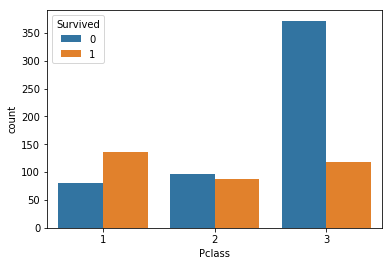

In [14]:
# look at surivival rates first then look at the number of people in each class

var = 'Pclass'
#sns.barplot(x = var, y = 'Survived',data = train_df[[var,'Survived']])
sns.countplot(train_df['Pclass'], hue = train_df.Survived)
train_df[['Pclass','Survived']].groupby('Pclass').mean()
# first class clearly had better chances of survival
# as classes decreased, chance of survival decreased 

We can see that although Pclass = 3 had the most passengers (approximately more than the other two combined) they had the lowest survival rates by far with approximately 25%.

Pclass should be a strong factor in the model

### Embarked

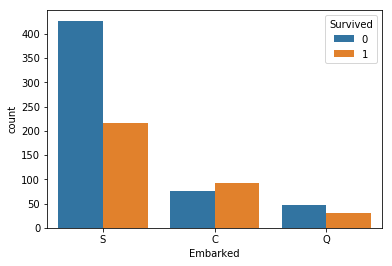

In [15]:
var = 'Embarked'

sns.countplot(train_df['Embarked'],hue = train_df['Survived'])
#sns.barplot(x = var, y = 'Survived',data = train_df[[var,'Survived']])
# here we can see that embarked = S had the most dead
# that is interesting

### Fare

In [16]:
sum(dataset['Fare'].isna())

dataset.Fare.fillna(dataset.Fare.mean(), inplace = True)

C:\Users\codyl\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


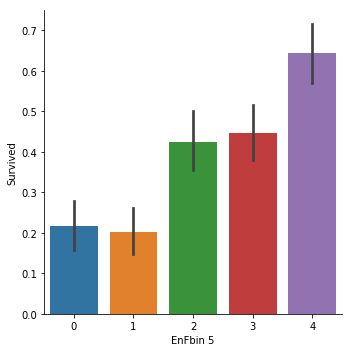

In [17]:
# use qcuts to divide the data into sections of equal size
# then use encoding on the quantiles to convert the sections into numbers for the model
# 
from sklearn.preprocessing import LabelEncoder

dataset['Fbin 5'] = pd.qcut(dataset['Fare'], 5, duplicates = 'drop')
dataset['Fbin 6'] = pd.qcut(dataset['Fare'], 6, duplicates = 'drop')

labelencoder = LabelEncoder()
dataset['EnFbin 5'] = labelencoder.fit_transform(dataset['Fbin 5'])
dataset['EnFbin 6'] = labelencoder.fit_transform(dataset['Fbin 6'])

df_5 = pd.crosstab(dataset['EnFbin 5'], dataset['Pclass'])
df_6 = pd.crosstab(dataset['EnFbin 6'],dataset['Pclass'])


g1 = sns.catplot(x='EnFbin 5', y="Survived", data=dataset, kind='bar')



#sns.catplot(x ='EnFbin 5', y = 'Survived' ,data = dataset, kind = 'bar')
#ns.countplot(En)
# Here we can see correlation for the highest paying to survival rates

### Age

C:\Users\codyl\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


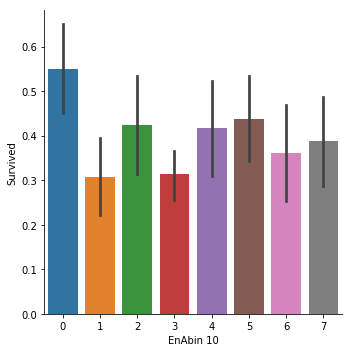

In [18]:
# use qcuts to divide the data into sections
# we will try to do that with Age for 5 quantiles and 10 g
dataset.Age.fillna(dataset['Age'].median(), inplace = True)


dataset['Abin 5'] = pd.qcut(dataset['Age'], 5 , duplicates = 'drop')
dataset['Abin 10'] = pd.qcut(dataset['Age'], 10 , duplicates = 'drop')

labelencoderA = LabelEncoder()

dataset['EnAbin 5'] = labelencoderA.fit_transform(dataset['Abin 5'])
dataset['EnAbin 10'] = labelencoderA.fit_transform(dataset['Abin 10'])

dfA5 = pd.crosstab(dataset['EnAbin 5'], dataset['Pclass'])
dfA10 = pd.crosstab( dataset['EnAbin 10'], dataset['Pclass'] )
# Here we want age on y and pclass on x
sns.catplot(x = 'EnAbin 10', y ='Survived' , data = dataset, kind = 'bar')


### Parch is the number of parent/children on board
  

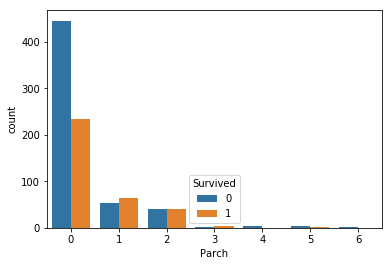

In [19]:
var = 'Parch'
sns.countplot(train_df['Parch'], hue = train_df['Survived'])

# not conclusive

In [20]:
train_df['Parch'].value_counts()

# most people had no children on board and those that did primarily had 1 or 2
# any number more than that does not have a large sample of data

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

SibSp is the number of sibblings the passenger had onboard the ship

C:\Users\codyl\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


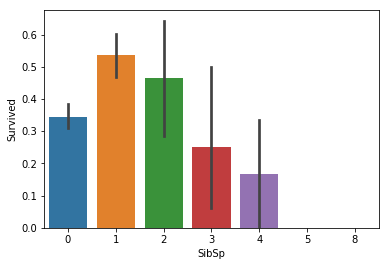

In [21]:
var = 'SibSp'
sns.barplot(x = var, y = 'Survived',data = train_df[[var,'Survived']])

# Not conclusive

In [22]:
train_df['SibSp'].value_counts()
# interestingly enough the portion with the highest survival rate grouped by SibSp is with 1 sibbling onboard
# Passengers with more sibblings than that had decreasing survival rates

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

So the parameters which have a correlation with survival rate are:
Pclass and Sex

The other parameters here:
SibSp, Parch and Embarked did not have a direct correlation

So we can use the first two as a part of the model
The last three can be used to derive other information that may have better correlation

In [23]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Gender'],
      dtype='object')

The Numerical columns are:
Fare and Age


We will start with Age


C:\Users\codyl\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\codyl\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


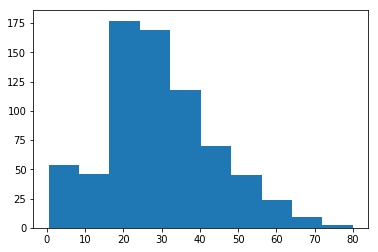

In [24]:
# For numerical data, plots like distributions and histograms are useful
# histograms can be used to find the distribution of ages
plt.hist(train_df['Age']);
# We can see most people are in their 20's and 30's

C:\Users\codyl\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\codyl\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([13.,  5., 11.,  5., 51., 48., 56., 54., 30., 34., 28., 17., 23.,
        15.,  7.,  8.,  7.,  6.,  2.,  4.]),
 array([ 1.  ,  4.65,  8.3 , 11.95, 15.6 , 19.25, 22.9 , 26.55, 30.2 ,
        33.85, 37.5 , 41.15, 44.8 , 48.45, 52.1 , 55.75, 59.4 , 63.05,
        66.7 , 70.35, 74.  ]),
 <a list of 20 Patch objects>)

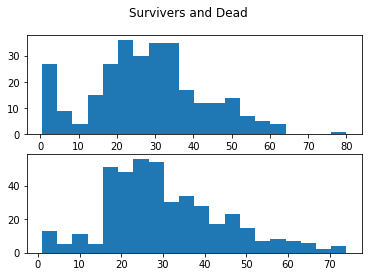

In [25]:
# Now we can try to find ages and the survival rates
# it would be messy to try an get a distribution for surival rates for all ages, but we can try
# So we need to split train_df into two groupsThe livng and the dead then plot their histograms

survivers = train_df[train_df['Survived']==1]
dead = train_df[train_df['Survived']==0]

fig,ax = plt.subplots(2)
fig.suptitle('Survivers and Dead')
ax[0].hist(survivers['Age'], bins = 20)

ax[1].hist(dead['Age'], bins = 20)



In [26]:
# Survivers vs dead ratio for age

(survivers['Age'].value_counts())/(dead['Age'].value_counts())

0.42          NaN
0.67          NaN
0.75          NaN
0.83          NaN
0.92          NaN
1.00     2.500000
2.00     0.428571
3.00     5.000000
4.00     2.333333
5.00          NaN
6.00     2.000000
7.00     0.500000
8.00     1.000000
9.00     0.333333
10.00         NaN
11.00    0.333333
12.00         NaN
13.00         NaN
14.00    1.000000
14.50         NaN
15.00    4.000000
16.00    0.545455
17.00    0.857143
18.00    0.529412
19.00    0.562500
20.00    0.250000
20.50         NaN
21.00    0.263158
22.00    0.687500
23.00    0.500000
           ...   
44.00    0.500000
45.00    0.714286
45.50         NaN
46.00         NaN
47.00    0.125000
48.00    2.000000
49.00    2.000000
50.00    1.000000
51.00    0.400000
52.00    1.000000
53.00         NaN
54.00    0.600000
55.00    1.000000
55.50         NaN
56.00    1.000000
57.00         NaN
58.00    1.500000
59.00         NaN
60.00    1.000000
61.00         NaN
62.00    1.000000
63.00         NaN
64.00         NaN
65.00         NaN
66.00     

There are more dead than survivers. The main difference in the distribution of the histogram however is the infant age of uder 5 years old

The histograms look remarkablely similar but the infant survival rate is very high in comparison. This may be the only age group where there are more survivers than dead

Fare

In [27]:
train_df['Fare'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

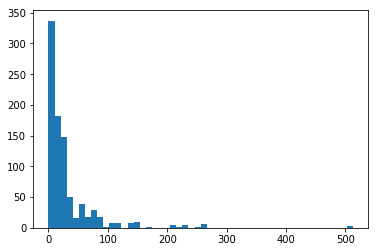

In [28]:
plt.hist(train_df['Fare'], bins = 50);

# Age

This section is missing data. There are a couple ways to fill this in. 

1. We can fill in the missing values with the mean value or mean value plus randomly generated values within the standard deviation

2. We can guess based off of the other correlated data such as Pclass and Sex for median values

Method two takes the process of dividing everything into 



After the age has been filled, we can also divide ages into groups (senior, teen, adult, infant, etc) for a better representation for the model

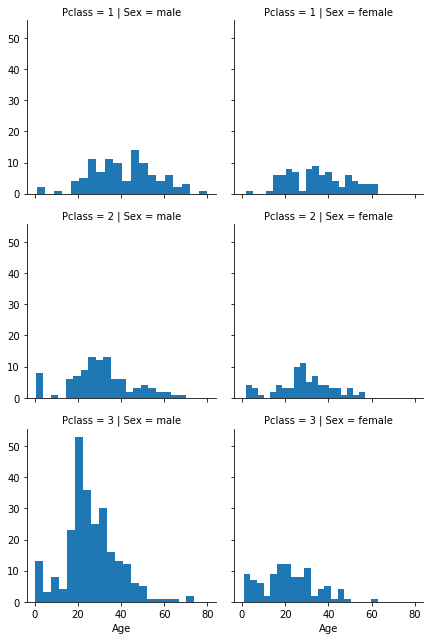

In [30]:
# so we will have 6 sections of ages which differ by the sex and Pclass
import seaborn as sns

grid = sns.FacetGrid(data = train_df,row = 'Pclass', col = 'Sex')
grid.map(plt.hist, 'Age', bins = 20)
grid.add_legend()


In [31]:
# this creates an array of zeros
guess_ages = np.zeros((2,3))
guess_ages

combine = [train_df, test_df]

In [32]:
# or just do this...just take the mean and appearenly it doesnt do anything to the score
# this part fills in the missing age data with the mean value
# create copy to not mess up original data
train_df2 = train_df.copy()
train_df2['Age'].fillna(train_df2['Age'].mean(), inplace = True)
train_df2.Age = train_df2.Age.round()

test_df2 = test_df.copy()
test_df2['Age'].fillna(test_df2['Age'].mean(), inplace = True)
test_df2.Age = test_df2.Age.round()

More on missing data

In [33]:
def percentage(numerator, denomenator):
    
    if type(numerator) == pd.core.series.Series:
        return (numerator/denomenator*100).map('{:.1f}%'.format)
    
    elif type(numerator) == int or type(numerator) == float:
        return '{:.1f}%'.format(float(numerator)/float(denomenator)*100) 
    
    else:
        print("check type")

In [34]:
percentage(dataset.count()-1, dataset.shape[0]-1)

# The variables with nan values are Age, Embarked, Fare and Cabin
# in particular Cabin is almost exclusively null values

PassengerId    100.0%
Survived        68.0%
Pclass         100.0%
Name           100.0%
Sex            100.0%
Age            100.0%
SibSp          100.0%
Parch          100.0%
Ticket         100.0%
Fare           100.0%
Cabin           22.5%
Embarked        99.8%
Fbin 5         100.0%
Fbin 6         100.0%
EnFbin 5       100.0%
EnFbin 6       100.0%
Abin 5         100.0%
Abin 10        100.0%
EnAbin 5       100.0%
EnAbin 10      100.0%
dtype: object

In [35]:
train_df['Cabin'][train_df['Cabin'].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [45]:
def NotNull():
    new_list = []
    for i in train_df['Cabin']:
        if isinstance(i, str) == True:
            new_list.append(i)
        
    return new_list
NotNull()

['C85',
 'C123',
 'E46',
 'G6',
 'C103',
 'D56',
 'A6',
 'C23 C25 C27',
 'B78',
 'D33',
 'B30',
 'C52',
 'B28',
 'C83',
 'F33',
 'F G73',
 'C23 C25 C27',
 'E31',
 'A5',
 'D10 D12',
 'D26',
 'C110',
 'B58 B60',
 'E101',
 'D26',
 'F E69',
 'D47',
 'C123',
 'B86',
 'F2',
 'C2',
 'E33',
 'B19',
 'A7',
 'C49',
 'F4',
 'A32',
 'F2',
 'B4',
 'B80',
 'G6',
 'A31',
 'D36',
 'D15',
 'C93',
 'C83',
 'C78',
 'D35',
 'G6',
 'C87',
 'B77',
 'E67',
 'B94',
 'C125',
 'C99',
 'C118',
 'D7',
 'A19',
 'B49',
 'D',
 'C22 C26',
 'C106',
 'B58 B60',
 'E101',
 'C22 C26',
 'C65',
 'E36',
 'C54',
 'B57 B59 B63 B66',
 'C7',
 'E34',
 'C32',
 'D',
 'B18',
 'C124',
 'C91',
 'C2',
 'E40',
 'T',
 'F2',
 'C23 C25 C27',
 'F33',
 'C128',
 'E33',
 'D37',
 'B35',
 'E50',
 'C82',
 'B96 B98',
 'D36',
 'G6',
 'C78',
 'E10',
 'C52',
 'E44',
 'B96 B98',
 'C23 C25 C27',
 'A34',
 'C104',
 'C111',
 'C92',
 'E38',
 'D21',
 'E12',
 'E63',
 'D',
 'A14',
 'B49',
 'C93',
 'B37',
 'C30',
 'D20',
 'C22 C26',
 'B79',
 'C65',
 'E25',
 'D

The first number of each cabin refers to the deck the cabin was one

A refers to the top cabin, F is the lowest deck

In [46]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Gender'],
      dtype='object')

In [47]:
dataset[dataset['Cabin'].notnull()].groupby('Pclass').Pclass.count()

Pclass
1    256
2     23
3     16
Name: Pclass, dtype: int64

In [48]:
# concerned with survived, cabin and Pclass

dataset[dataset['Cabin'].notnull()].groupby(['Survived','Pclass'])['Cabin'].count()

# So those with a cabin had a better chance of survival
# also, those with a pclass = 1 had a greater chance of having a cabin listed

Survived  Pclass
0.0       1          59
          2           3
          3           6
1.0       1         117
          2          13
          3           6
Name: Cabin, dtype: int64

We now try to find the relationship between the deck level and survival 

To do that we need to extract the letter of the deck

In [49]:
dataset['Deck']  = dataset['Cabin'].str.extract(pat = '([A-Z])')

In [50]:
# counts the number of decks for each pclass
dataset[dataset['Deck'].notnull()].groupby(['Deck','Pclass']).Deck.count()

Deck  Pclass
A     1         22
B     1         65
C     1         94
D     1         40
      2          6
E     1         34
      2          4
      3          3
F     2         13
      3          8
G     3          5
T     1          1
Name: Deck, dtype: int64

In [51]:
# want number of survived and dead
dataset[dataset['Deck'].notnull() & dataset['Survived'] == 1.0].groupby(['Survived','Pclass']).Survived.count()

Survived  Pclass
1.0       1         117
          2          13
          3           6
Name: Survived, dtype: int64

In [52]:
# want number of survived and dead
dataset[dataset['Deck'].notnull()].groupby(['Survived','Pclass', 'Deck']).Survived.count()

Survived  Pclass  Deck
0.0       1       A        8
                  B       12
                  C       24
                  D        7
                  E        7
                  T        1
          2       D        1
                  E        1
                  F        1
          3       F        4
                  G        2
1.0       1       A        7
                  B       35
                  C       35
                  D       22
                  E       18
          2       D        3
                  E        3
                  F        7
          3       E        3
                  F        1
                  G        2
Name: Survived, dtype: int64

In [53]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Gender'],
      dtype='object')

# Machine Learning

In [54]:
class_columns = ['Pclass', 'Sex', 'Parch', 'Age']
X = pd.get_dummies(train_df2[class_columns])
y = train_df2.Survived
X_test = pd.get_dummies(test_df2[class_columns])

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf_model.fit(X,y)
# so ft_model fit trains your model based on the training datase
predictions = rf_model.predict(X_test)

In [55]:
rf_model.score(X,y)

0.8372615039281706

In [56]:
X_test.head()

,Pclass,Parch,Age,Sex_female,Sex_male
0,3,0,34.0,0,1
1,3,0,47.0,1,0
2,2,0,62.0,0,1
3,3,0,27.0,0,1
4,3,1,22.0,1,0


In [57]:
X

,Pclass,Parch,Age,Sex_female,Sex_male
0,3,0,22.0,0,1
1,1,0,38.0,1,0
2,3,0,26.0,1,0
3,1,0,35.0,1,0
4,3,0,35.0,0,1
5,3,0,30.0,0,1
6,1,0,54.0,0,1
7,3,1,2.0,0,1
8,3,2,27.0,1,0
9,2,0,14.0,1,0


In [58]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [59]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
test_df.PassengerId

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [61]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
